In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

            Time_s  Sensor0_Raw  Sensor1_Raw  DutyCycle
6660  1.736116e+09       1.1806       1.4193       83.0
2210  1.736116e+09       1.2516       1.7129        2.0
5751  1.736116e+09       1.2032       1.4742       52.0
4859  1.736116e+09       1.1000       1.1452      213.0
5636  1.736116e+09       1.1806       1.4613       78.0
(7056, 4)


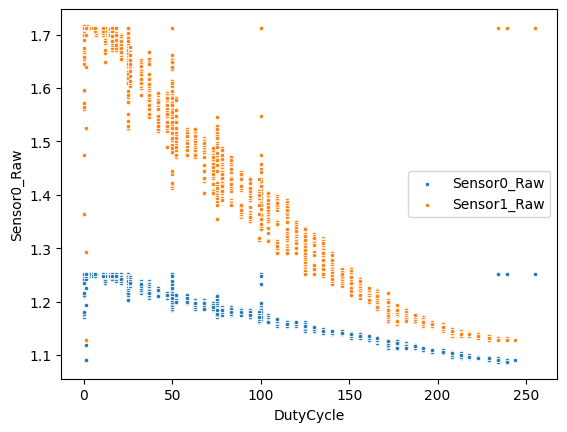

In [46]:
df = pd.read_csv('calibration_data.csv')
print(df.sample(5))
print(df.shape)

sns.scatterplot(x="DutyCycle", y="Sensor0_Raw", data=df,marker='.',label="Sensor0_Raw", linewid)
sns.scatterplot(x="DutyCycle", y="Sensor1_Raw", data=df,marker='.',label="Sensor1_Raw")
plt.legend()
plt.show()

In [33]:
X = np.array(df[['DutyCycle', 'Sensor1_Raw']])
y = np.array(df['Sensor0_Raw']) # magnet and permanent magnet

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9970895976023013

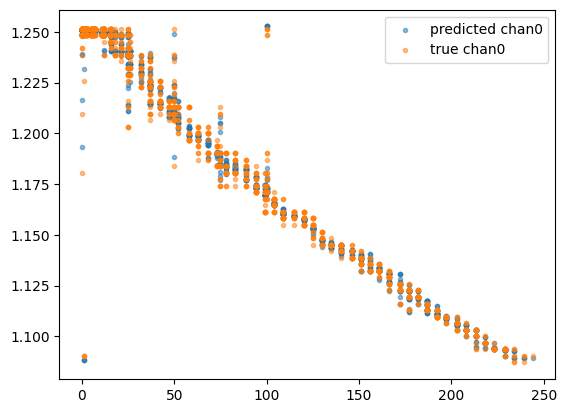

In [34]:
plt.scatter(X_test[:,0], model.predict(X_test), label='predicted chan0', marker='.', alpha=0.5)
plt.scatter(X_test[:,0], y_test, label='true chan0', marker='.',alpha=0.5)
plt.legend()

In [35]:
pred = model.predict(np.array([0,1.6]).reshape(1,-1))[0]

pred

1.2185007790152287

In [36]:
2.4 - pred

1.1814992209847712